# 1. Importing Libraries and dataset

In [123]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [124]:
# Loading the dataset
df=pd.read_csv('anime.csv')
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [125]:
df.shape

(12294, 7)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [128]:
#checking Missing Values
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [129]:
df['genre']=df['genre'].fillna('None')
df['type']=df['type'].fillna('None')
df['rating']=df['rating'].fillna(df['rating'].median())

In [130]:
# Converting the episodes with Numeric Values to Integers
df['episodes'] = pd.to_numeric(df['episodes'],errors='coerce')

In [131]:
# checking episodes with NAN values.
df[df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members
74,21,One Piece,"Action, Adventure, Comedy, Drama, Fantasy, Sho...",TV,NaN,8.58,504862
252,235,Detective Conan,"Adventure, Comedy, Mystery, Police, Shounen",TV,NaN,8.25,114702
615,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,NaN,7.94,533578
991,966,Crayon Shin-chan,"Comedy, Ecchi, Kids, School, Shounen, Slice of...",TV,NaN,7.73,26267
1021,33157,Tanaka-kun wa Itsumo Kedaruge Specials,"Comedy, School, Slice of Life",Special,NaN,7.72,5400
...,...,...,...,...,...,...,...
12265,34361,Kyonyuu Reijou MC Gakuen,Hentai,OVA,NaN,6.57,205
12274,34492,Nuki Doki! Tenshi to Akuma no Sakusei Battle -...,Hentai,OVA,NaN,6.57,392
12280,34312,Saimin Class,Hentai,OVA,NaN,6.57,240
12282,34388,Shikkoku no Shaga The Animation,Hentai,OVA,NaN,6.57,195


In [132]:
# Dropping Rows with NAN in Episodes.
df.dropna(axis=0,inplace=True)
df[df['episodes'].isna()]

,anime_id,name,genre,type,episodes,rating,members


In [133]:
df.isnull().sum()

anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11954 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  11954 non-null  int64  
 1   name      11954 non-null  object 
 2   genre     11954 non-null  object 
 3   type      11954 non-null  object 
 4   episodes  11954 non-null  float64
 5   rating    11954 non-null  float64
 6   members   11954 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 747.1+ KB


Text(0.5, 1.0, 'Anime Average Rating Distribution')

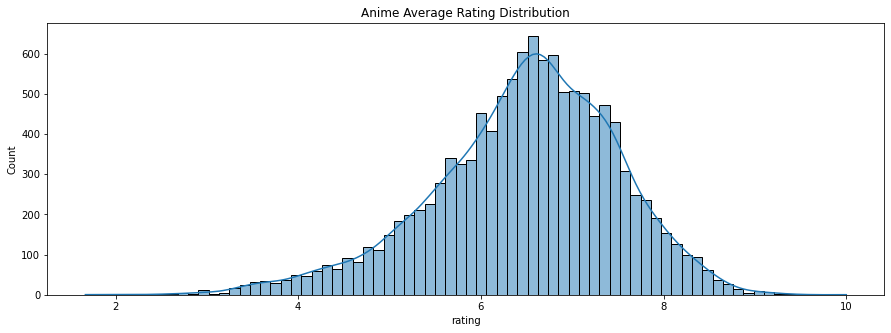

In [135]:
# Visualize Rating Distribution
plt.figure(figsize=(15,5))
sns.histplot(data=df,x='rating',kde=True)
plt.title('Anime Average Rating Distribution')

Text(0.5, 1.0, 'Anime Types')

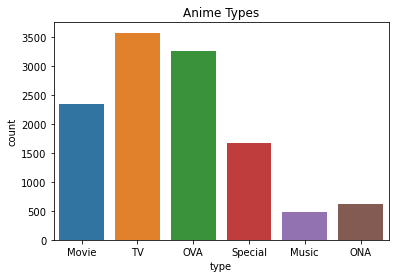

In [136]:
# Visualize Type features
sns.countplot(data=df,x='type')
plt.title('Anime Types')

In [137]:
# Top 10 genre
top_genre=df['genre'].value_counts().head(10)
top_genre

Hentai                   787
Comedy                   500
Music                    298
Kids                     192
Comedy, Slice of Life    167
Dementia                 137
Fantasy, Kids            128
Fantasy                  111
Drama, Kids              105
Drama                    105
Name: genre, dtype: int64

In [138]:
grp=df.groupby('genre')
grp.agg('mean')['rating']

genre
Action                                                     5.815472
Action, Adventure                                          6.187333
Action, Adventure, Cars, Comedy, Sci-Fi, Shounen           6.865000
Action, Adventure, Cars, Mecha, Sci-Fi, Shounen, Sports    6.460000
Action, Adventure, Cars, Sci-Fi                            6.860000
                                                             ...   
Super Power, Supernatural, Vampire                         4.760000
Supernatural                                               5.563571
Thriller                                                   6.510000
Vampire                                                    4.240000
Yaoi                                                       5.645000
Name: rating, Length: 3223, dtype: float64

In [139]:
genre_order_by_rating=grp.agg('mean')['rating'].sort_values(ascending=False)
genre_order_by_rating

genre
Action, Adventure, Drama, Fantasy, Magic, Military, Shounen    9.26
Drama, Fantasy, Romance, Slice of Life, Supernatural           9.06
Drama, School, Shounen                                         9.05
Action, Drama, Mecha, Military, Sci-Fi, Super Power            8.98
Adventure, Drama, Supernatural                                 8.93
                                                               ... 
Action, Demons, Seinen, Super Power                            3.32
Kids, Mecha                                                    3.26
Action, Adventure, Sci-Fi, Space, Super Power                  3.25
Dementia, Kids                                                 3.21
Comedy, Dementia, Fantasy, Horror, Music, Parody               2.55
Name: rating, Length: 3223, dtype: float64

In [140]:
top_100 =df.sort_values(by='rating',ascending=False).head(100)
top_100

,anime_id,name,genre,type,episodes,rating,members
10464,33662,Taka no Tsume 8: Yoshida-kun no X-Files,"Comedy, Parody",Movie,1.0,10.00,13
9595,23005,Mogura no Motoro,Slice of Life,Movie,1.0,9.50,62
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
9078,33607,Kahei no Umi,Historical,Movie,1.0,9.33,44
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
...,...,...,...,...,...,...,...
77,5205,Kara no Kyoukai 7: Satsujin Kousatsu (Kou),"Action, Mystery, Romance, Supernatural, Thriller",Movie,1.0,8.57,95658
78,17389,Kingdom 2nd Season,"Action, Historical, Military, Seinen",TV,39.0,8.57,31234
80,10162,Usagi Drop,"Josei, Slice of Life",TV,11.0,8.56,194855
79,170,Slam Dunk,"Comedy, Drama, School, Shounen, Sports",TV,101.0,8.56,82570


Text(0.5, 1.0, 'Top 100 Anime rating by Type')

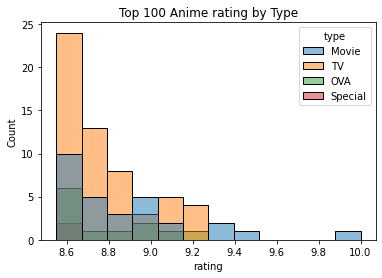

In [141]:
sns.histplot(data=top_100,x='rating',hue='type')
plt.title('Top 100 Anime rating by Type')

In [142]:
anime_rating = df.groupby('type')['rating'].mean().sort_values(ascending=False)
anime_rating

type
TV         6.928340
Special    6.525961
OVA        6.371751
Movie      6.323626
ONA        5.637651
Music      5.588665
Name: rating, dtype: float64

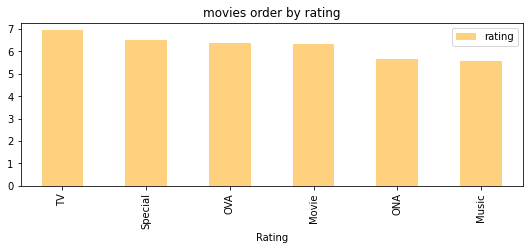

In [143]:
anime_rating.plot(kind='bar',color='orange',figsize=(9,3),
                            title='movies order by rating',
                            xlabel='Rating',
                            legend=True,
                            alpha=0.5
                           )
plt.show()

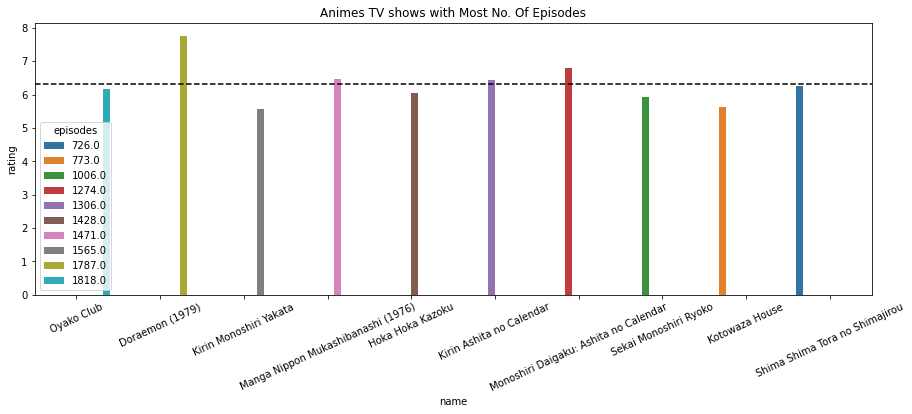

In [144]:
top_10_episodes = df.sort_values(by='episodes',ascending=False).head(10)
plt.figure(figsize=(15,5))
sns.barplot(data=top_10_episodes,x='name',y='rating',hue='episodes')
plt.title('Animes TV shows with Most No. Of Episodes')
plt.xticks(rotation=25)
plt.axhline(top_10_episodes['rating'].mean(),linestyle='--',color='black')
plt.show()

In [145]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members'], dtype='object')

In [146]:
df.head(5)

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


## Feature Extraction

In [147]:
df_genre_split = df['genre'].str.get_dummies(', ')
df_genre_split

,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [148]:
anime_df=df.copy()

In [149]:
anime_df.drop('genre',axis=1,inplace=True)

In [150]:
anime_df_genre = pd.concat([anime_df,df_genre_split],axis=1)

In [151]:
anime_df_genre.head(2)

,anime_id,name,type,episodes,rating,members,Action,Adventure,Cars,Comedy,...,Shounen Ai,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Vampire,Yaoi,Yuri
0,32281,Kimi no Na wa.,Movie,1.0,9.37,200630,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,TV,64.0,9.26,793665,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [152]:
anime_df.isna().any()

anime_id    False
name        False
type        False
episodes    False
rating      False
members     False
dtype: bool

In [154]:
anime_types_split = pd.get_dummies(anime_df_genre['type'],dtype=int)
anime_types_split

,Movie,Music,ONA,OVA,Special,TV
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,0,0,1
...,...,...,...,...,...,...
12289,0,0,0,1,0,0
12290,0,0,0,1,0,0
12291,0,0,0,1,0,0
12292,0,0,0,1,0,0


In [155]:
anime_type = anime_df_genre.drop('type',axis=1)

In [156]:
anime_type = pd.concat([anime_type,anime_types_split],axis=1)
anime_type.head(2)

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Thriller,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [157]:
anime_encoded=anime_type.copy()

## Normalizing the Rating in anime Dataset

In [158]:
# Normalizing the Ratings -  To make ratings compareable.
# (rating-min)/(max-min)
anime_normalized_rating = anime_encoded.copy()
anime_rating = anime_normalized_rating['rating']
anime_normalized_rating['nor_rating'] = (anime_rating-anime_rating.min())/(anime_rating.max()-anime_rating.min())
     

In [159]:
anime_normalized_rating.head(2)

,anime_id,name,episodes,rating,members,Action,Adventure,Cars,Comedy,Dementia,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,32281,Kimi no Na wa.,1.0,9.37,200630,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,5114,Fullmetal Alchemist: Brotherhood,64.0,9.26,793665,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0.911164


## Recommendation System

In [160]:
anime_recommend = anime_normalized_rating.drop(['rating','members','anime_id'],axis=1)

In [161]:
anime_recommend.head(2)

,name,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
0,Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.924370
1,Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0.911164


In [162]:
anime_recommend.index= anime_normalized_rating['name']
anime_recommend.drop('name',axis=1,inplace=True)

In [163]:
anime_recommend.head()

,episodes,Action,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,...,Vampire,Yaoi,Yuri,Movie,Music,ONA,OVA,Special,TV,nor_rating
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,1.0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0.924370
Fullmetal Alchemist: Brotherhood,64.0,1,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0.911164
Gintama°,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.909964
Steins;Gate,24.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.900360
Gintama&#039;,51.0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0.899160


In [164]:
anime_recommend.dtypes

episodes         float64
Action             int64
Adventure          int64
Cars               int64
Comedy             int64
Dementia           int64
Demons             int64
Drama              int64
Ecchi              int64
Fantasy            int64
Game               int64
Harem              int64
Hentai             int64
Historical         int64
Horror             int64
Josei              int64
Kids               int64
Magic              int64
Martial Arts       int64
Mecha              int64
Military           int64
Music              int64
Mystery            int64
None               int64
Parody             int64
Police             int64
Psychological      int64
Romance            int64
Samurai            int64
School             int64
Sci-Fi             int64
Seinen             int64
Shoujo             int64
Shoujo Ai          int64
Shounen            int64
Shounen Ai         int64
Slice of Life      int64
Space              int64
Sports             int64
Super Power        int64


In [165]:
from sklearn.metrics.pairwise import cosine_similarity

In [166]:
anime_sim_arr=cosine_similarity(anime_recommend)
anime_sim_arr

array([[1.        , 0.39252785, 0.38759844, ..., 0.39057265, 0.2938871 ,
        0.5162752 ],
       [0.39252785, 1.        , 0.99840281, ..., 0.93921989, 0.56530594,
        0.56141809],
       [0.38759844, 0.99840281, 1.        , ..., 0.93896576, 0.56576186,
        0.56198604],
       ...,
       [0.39057265, 0.93921989, 0.93896576, ..., 1.        , 0.8127866 ,
        0.67837147],
       [0.2938871 , 0.56530594, 0.56576186, ..., 0.8127866 , 1.        ,
        0.68527554],
       [0.5162752 , 0.56141809, 0.56198604, ..., 0.67837147, 0.68527554,
        1.        ]])

In [167]:
np.fill_diagonal(anime_sim_arr,val=0)

In [168]:
anime_sim_matrix=pd.DataFrame(anime_sim_arr,columns=anime_recommend.index,
                         index=anime_recommend.index
                         )
anime_sim_matrix

name,Kimi no Na wa.,Fullmetal Alchemist: Brotherhood,Gintama°,Steins;Gate,Gintama&#039;,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Gakuen Koukou,Hunter x Hunter (2011),Ginga Eiyuu Densetsu,Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare,Gintama&#039;: Enchousen,...,Silent Chaser Kagami,Super Erotic Anime,Teleclub no Himitsu,Tenshi no Habataki Jun,The Satisfaction,Toushindai My Lover: Minami tai Mecha-Minami,Under World,Violence Gekiga David no Hoshi,Violence Gekiga Shin David no Hoshi: Inma Densetsu,Yasuji no Pornorama: Yacchimae!!
name,,,,,,,,,,,,,,,,,,,,,
Kimi no Na wa.,0.000000,0.392528,0.387598,0.393901,0.387525,0.474180,0.384042,0.388202,0.344699,0.396036,...,0.293304,0.356675,0.359908,0.280882,0.281704,0.277146,0.279850,0.390573,0.293887,0.516275
Fullmetal Alchemist: Brotherhood,0.392528,0.000000,0.998403,0.996816,0.998404,0.972338,0.999299,0.999084,0.333193,0.978360,...,0.565532,0.810071,0.809011,0.569749,0.569504,0.570803,0.570049,0.939220,0.565306,0.561418
Gintama°,0.387598,0.998403,0.000000,0.997313,1.000000,0.973205,0.998680,0.998391,0.367826,0.986232,...,0.565981,0.810057,0.809036,0.570050,0.569815,0.571060,0.570338,0.938966,0.565762,0.561986
Steins;Gate,0.393901,0.996816,0.997313,0.000000,0.997309,0.971695,0.997083,0.997151,0.342384,0.980470,...,0.569421,0.811407,0.810592,0.572692,0.572509,0.573467,0.572915,0.939236,0.569240,0.566068
Gintama&#039;,0.387525,0.998404,1.000000,0.997309,0.000000,0.973190,0.998682,0.998393,0.367767,0.986222,...,0.565936,0.810032,0.809008,0.570014,0.569778,0.571026,0.570303,0.938950,0.565717,0.561934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Toushindai My Lover: Minami tai Mecha-Minami,0.277146,0.570803,0.571060,0.573467,0.571026,0.565296,0.569955,0.575416,0.230081,0.566097,...,0.998579,0.943546,0.943941,0.999927,0.999891,0.000000,0.999962,0.816720,0.998472,0.678512
Under World,0.279850,0.570049,0.570338,0.572915,0.570303,0.565196,0.569131,0.574602,0.232254,0.565819,...,0.999007,0.943289,0.943777,0.999994,0.999982,0.999962,0.000000,0.816264,0.998917,0.679719
Violence Gekiga David no Hoshi,0.390573,0.939220,0.938966,0.939236,0.938950,0.916393,0.939367,0.941587,0.325781,0.921478,...,0.812970,0.961745,0.961271,0.816073,0.815913,0.816720,0.816264,0.000000,0.812787,0.678371


In [169]:
anime='Gintama'

In [170]:
anime_sim_matrix.loc[anime].sort_values(ascending=False)[:5]

name
Dr. Slump: Arale-chan      0.999939
Keroro Gunsou              0.999938
Katekyo Hitman Reborn!     0.999938
Obocchama-kun              0.999936
Good Morning!!! Doronjo    0.999936
Name: Gintama, dtype: float64

Interview Questions:
1. Can you explain the difference between user-based and item-based collaborative filtering?

 User Based Collaborative Filtering takes into Account the rating given by multiple users/customers to a same item for recommending the items that were rated similar by other users/customers; i.e finding similar users.
Item Based Collaborative Filtering takes into account individual item attributes to qualitfy the similarity between each item. i.e finding similar items/products.

2. What is collaborative filtering, and how does it work?

  It is a technique used by recomendation system where the items or products are filtered based on the Similarites(Correlation, cosine, manhattan etc.) in the information like rating or other product/item attributes